# **Projeto: Previsão de Intenção de Compra de Clientes em Loja Web**

**Descrição do Projeto**

Neste projeto, nosso objetivo é criar um sistema inteligente para antecipar a intenção de compra dos clientes em um site de e-commerce. Imagine poder prever quais clientes têm maior probabilidade de realizar compras online, com base em suas características e comportamentos passados. Essa capacidade de prever a intenção de compra não só aprimorará a experiência do cliente, mas também permitirá que a empresa direcione seus esforços de marketing de forma mais eficaz.

**Objetivo**

Queremos desenvolver um modelo preditivo capaz de analisar os padrões de comportamento dos clientes e identificar sinais que indicam a propensão deles para realizar compras no site da empresa. Para isso, vamos usar uma base de dados que contém informações detalhadas sobre os clientes, incluindo:

Dados demográficos (idade, renda, etc.)

Informações sobre compras anteriores



# Base de dados:

Year_Birth: Ano de nascimento do cliente.

Education: Nível de escolaridade do cliente.

Marital_Status: Estado civil do cliente.

Income: Renda anual da família do cliente.

Kidhome: Número de crianças na casa do cliente.

Recency: Número de dias desde a última compra do cliente.

Complain: 1 se o cliente reclamou nos últimos 2 anos, 0 caso contrário.

MntWines: Valor gasto em vinhos nos últimos 2 anos.

MntFruits: Valor gasto em frutas nos últimos 2 anos.

MntMeatProducts: Valor gasto em carnes nos últimos 2 anos.

MntFishProducts: Valor gasto em peixes nos últimos 2 anos.

MntSweetProducts: Valor gasto em doces nos últimos 2 anos.

MntGoldProds: Valor gasto em produtos de ouro nos últimos 2 anos.

NumDealsPurchases: Número de compras feitas com desconto

NumStorePurchases: Número de compras feitas diretamente nas lojas.

NumWebVisitsMonth: Número de visitas ao site da empresa no último mês.






**WebPurchases: Número de compras feitas pelo site da empresa.**

# ETAPA 1:

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns


from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
df = pd.read_csv('marketing_campaign.csv', delimiter=';')

In [ ]:
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumStorePurchases,NumWebVisitsMonth,Complain,WebPurchases
0,1957,Graduation,Single,58138.0,0,58,635,88,546,172,88,88,4,7,0,1
1,1954,Graduation,Single,46344.0,1,38,11,1,6,2,1,6,2,5,0,0
2,1965,Graduation,Together,71613.0,0,26,426,49,127,111,21,42,10,4,0,1
3,1984,Graduation,Together,26646.0,1,26,11,4,20,10,3,5,4,6,0,0
4,1981,PhD,Married,58293.0,1,94,173,43,118,46,27,15,6,5,0,1


## Análisando Dados Faltantes

In [ ]:
df.isnull().sum()

,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Recency,0
MntWines,0
MntFruits,0
MntMeatProducts,0
MntFishProducts,0


In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

,0
Year_Birth,0
Education,0
Marital_Status,0
Income,0
Kidhome,0
Recency,0
MntWines,0
MntFruits,0
MntMeatProducts,0
MntFishProducts,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year_Birth         2216 non-null   int64  
 1   Education          2216 non-null   object 
 2   Marital_Status     2216 non-null   object 
 3   Income             2216 non-null   float64
 4   Kidhome            2216 non-null   int64  
 5   Recency            2216 non-null   int64  
 6   MntWines           2216 non-null   int64  
 7   MntFruits          2216 non-null   int64  
 8   MntMeatProducts    2216 non-null   int64  
 9   MntFishProducts    2216 non-null   int64  
 10  MntSweetProducts   2216 non-null   int64  
 11  MntGoldProds       2216 non-null   int64  
 12  NumStorePurchases  2216 non-null   int64  
 13  NumWebVisitsMonth  2216 non-null   int64  
 14  Complain           2216 non-null   int64  
 15  WebPurchases       2216 non-null   int64  
dtypes: float64(1), int64(13), obj

In [ ]:
df['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [ ]:
df['Marital_Status'].replace('YOLO', 'Single', inplace=True)
df['Marital_Status'].replace('Alone', 'Single', inplace=True)
df['Marital_Status'].replace('Absurd', 'Single', inplace=True)
df['Marital_Status'].replace('Absurd', 'Single', inplace=True)

/tmp/ipython-input-1234832461.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Marital_Status'].replace('YOLO', 'Single', inplace=True)
/tmp/ipython-input-1234832461.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tr

In [ ]:
df['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow'], dtype=object)

In [ ]:
df['Education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [ ]:
df['Education'].replace('2n Cycle', 'Master', inplace=True)

/tmp/ipython-input-3216684952.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Education'].replace('2n Cycle', 'Master', inplace=True)


In [ ]:
df['Education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic'], dtype=object)

In [ ]:
df = pd.get_dummies(df, columns=['Marital_Status', 'Education'], prefix=['Marital_Status', 'Education'], drop_first=True)

In [ ]:
df

,Year_Birth,Income,Kidhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,NumWebVisitsMonth,Complain,WebPurchases,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Education_Graduation,Education_Master,Education_PhD
0,1957,58138.0,0,58,635,88,546,172,88,88,...,7,0,1,False,True,False,False,True,False,False
1,1954,46344.0,1,38,11,1,6,2,1,6,...,5,0,0,False,True,False,False,True,False,False
2,1965,71613.0,0,26,426,49,127,111,21,42,...,4,0,1,False,False,True,False,True,False,False
3,1984,26646.0,1,26,11,4,20,10,3,5,...,6,0,0,False,False,True,False,True,False,False
4,1981,58293.0,1,94,173,43,118,46,27,15,...,5,0,1,True,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,61223.0,0,46,709,43,182,42,118,247,...,5,0,1,True,False,False,False,True,False,False
2236,1946,64014.0,2,56,406,0,30,0,0,8,...,7,0,1,False,False,True,False,False,False,True
2237,1981,56981.0,0,91,908,48,217,32,12,24,...,6,0,0,False,False,False,False,True,False,False
2238,1956,69245.0,0,8,428,30,214,80,30,61,...,3,0,1,False,False,True,False,False,True,False


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Year_Birth               2216 non-null   int64  
 1   Income                   2216 non-null   float64
 2   Kidhome                  2216 non-null   int64  
 3   Recency                  2216 non-null   int64  
 4   MntWines                 2216 non-null   int64  
 5   MntFruits                2216 non-null   int64  
 6   MntMeatProducts          2216 non-null   int64  
 7   MntFishProducts          2216 non-null   int64  
 8   MntSweetProducts         2216 non-null   int64  
 9   MntGoldProds             2216 non-null   int64  
 10  NumStorePurchases        2216 non-null   int64  
 11  NumWebVisitsMonth        2216 non-null   int64  
 12  Complain                 2216 non-null   int64  
 13  WebPurchases             2216 non-null   int64  
 14  Marital_Status_Married   2216

In [ ]:

df['Education_Graduation'] = df['Education_Graduation'].astype(int)
df['Education_Master'] = df['Education_Master'].astype(int)
df['Education_PhD'] = df['Education_PhD'].astype(int)
df['Marital_Status_Married'] = df['Marital_Status_Married'].astype(int)
df['Marital_Status_Single'] = df['Marital_Status_Single'].astype(int)
df['Marital_Status_Together'] = df['Marital_Status_Together'].astype(int)
df['Marital_Status_Widow'] = df['Marital_Status_Widow'].astype(int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Year_Birth               2216 non-null   int64  
 1   Income                   2216 non-null   float64
 2   Kidhome                  2216 non-null   int64  
 3   Recency                  2216 non-null   int64  
 4   MntWines                 2216 non-null   int64  
 5   MntFruits                2216 non-null   int64  
 6   MntMeatProducts          2216 non-null   int64  
 7   MntFishProducts          2216 non-null   int64  
 8   MntSweetProducts         2216 non-null   int64  
 9   MntGoldProds             2216 non-null   int64  
 10  NumStorePurchases        2216 non-null   int64  
 11  NumWebVisitsMonth        2216 non-null   int64  
 12  Complain                 2216 non-null   int64  
 13  WebPurchases             2216 non-null   int64  
 14  Marital_Status_Married   2216

## Analise dos Dados

In [ ]:
df.describe()

,Year_Birth,Income,Kidhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,NumWebVisitsMonth,Complain,WebPurchases,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Education_Graduation,Education_Master,Education_PhD
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.00000,2216.000000,2216.000000
mean,1968.820397,52247.251354,0.441787,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,...,5.319043,0.009477,0.504513,0.386733,0.215704,0.258574,0.034296,0.50361,0.254964,0.217058
std,11.985554,25173.076661,0.536896,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,...,2.425359,0.096907,0.500092,0.487112,0.411403,0.437950,0.182030,0.50010,0.435939,0.412335
min,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1959.000000,35303.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,1970.000000,51381.500000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,...,6.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000
75%,1977.000000,68522.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,...,7.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.00000,1.000000,0.000000
max,1996.000000,666666.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000


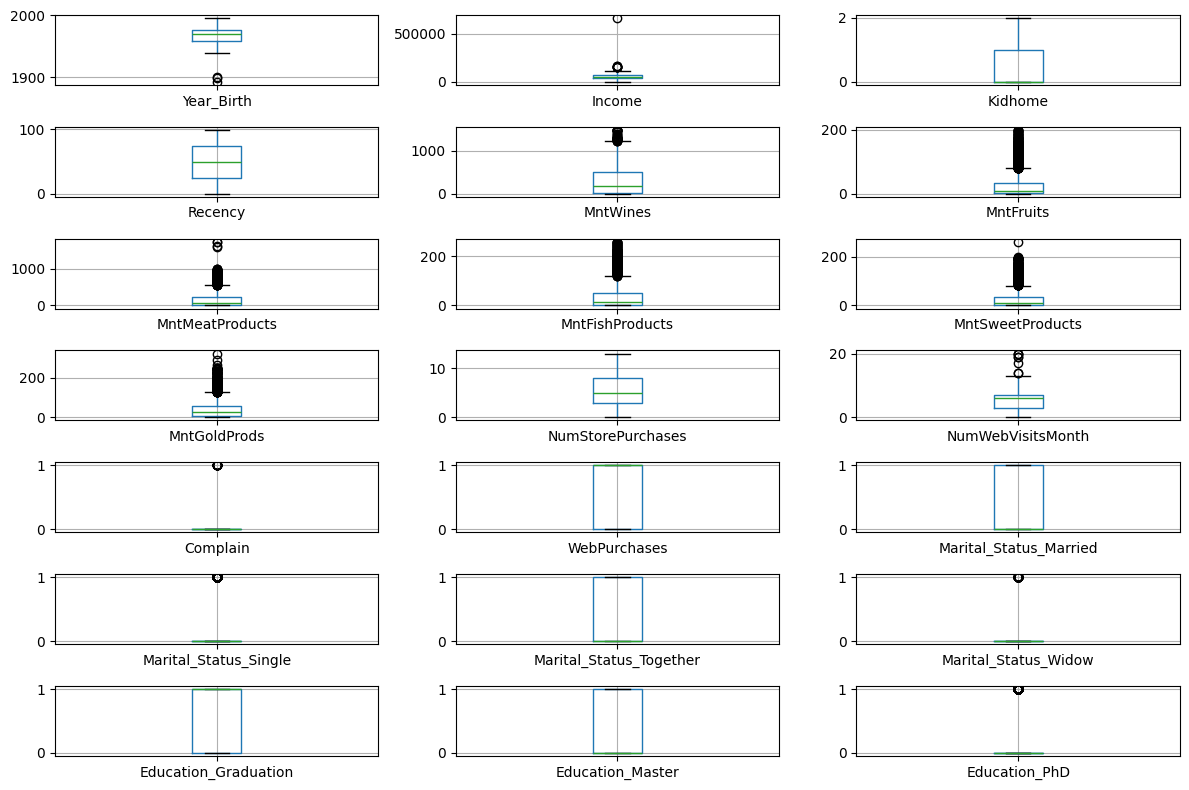

In [ ]:
# Retirando variáveis categóricas

# Tamanho da área de plotagem
fig = plt.figure(figsize = (12,8))

# Loop pelas variáveis contínuas
for i, col in enumerate(df):
    plt.subplot(7, 3, i + 1);
    df.boxplot(col);
    plt.tight_layout()

Podemos ver que temos outliers em todas as colunas que indicam o minimo de compras de certo produto (Gráfico 5 até o 10), isso nos indica que temos clientes que compram bastante, não seria um outlier digitado errado para tirarmos e é um dado importante para a análise do nosso modelo

In [ ]:
media = df.groupby('WebPurchases')['Income'].mean().reset_index()

fig = px.bar(media, x='WebPurchases', y='Income',
             title='Média de Salário por Compras no Site')
fig.show()

O gráfico acima nos mostra que pessoas que compram mais tem a tendência de receber salarios maiores, a média de salario de pessoas que não tiveram compras é de 41K e de pessoas que compraram é de 63K

In [ ]:
media = df.groupby('WebPurchases')['Marital_Status_Married'].mean().reset_index()

fig = px.bar(media, x='WebPurchases', y='Marital_Status_Married',
             title='Média de Compras no Site se o cliente é casado ou não')
fig.show()

/tmp/ipython-input-1695535349.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




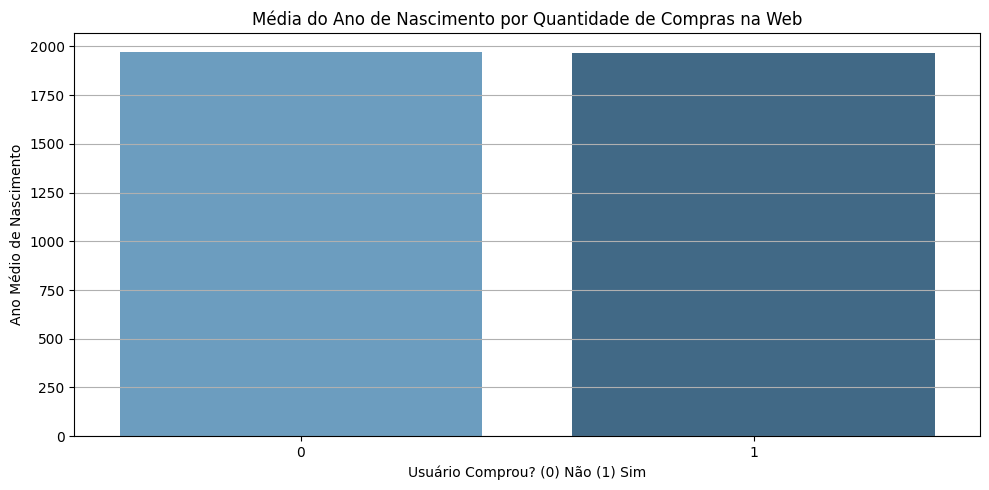

In [ ]:
media_por_web = df.groupby('WebPurchases')['Year_Birth'].mean().reset_index()

# Visualização
plt.figure(figsize=(10,5))
sns.barplot(x='WebPurchases', y='Year_Birth', data=media_por_web, palette='Blues_d')
plt.title('Média do Ano de Nascimento por Quantidade de Compras na Web')
plt.xlabel('Usuário Comprou? (0) Não (1) Sim')
plt.ylabel('Ano Médio de Nascimento')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Não temos uma grande diferença para usuários compradores e não compradores

In [ ]:
contagem = df['WebPurchases'].value_counts()
print(contagem)

WebPurchases
1    1118
0    1098
Name: count, dtype: int64


# ETAPA 2:





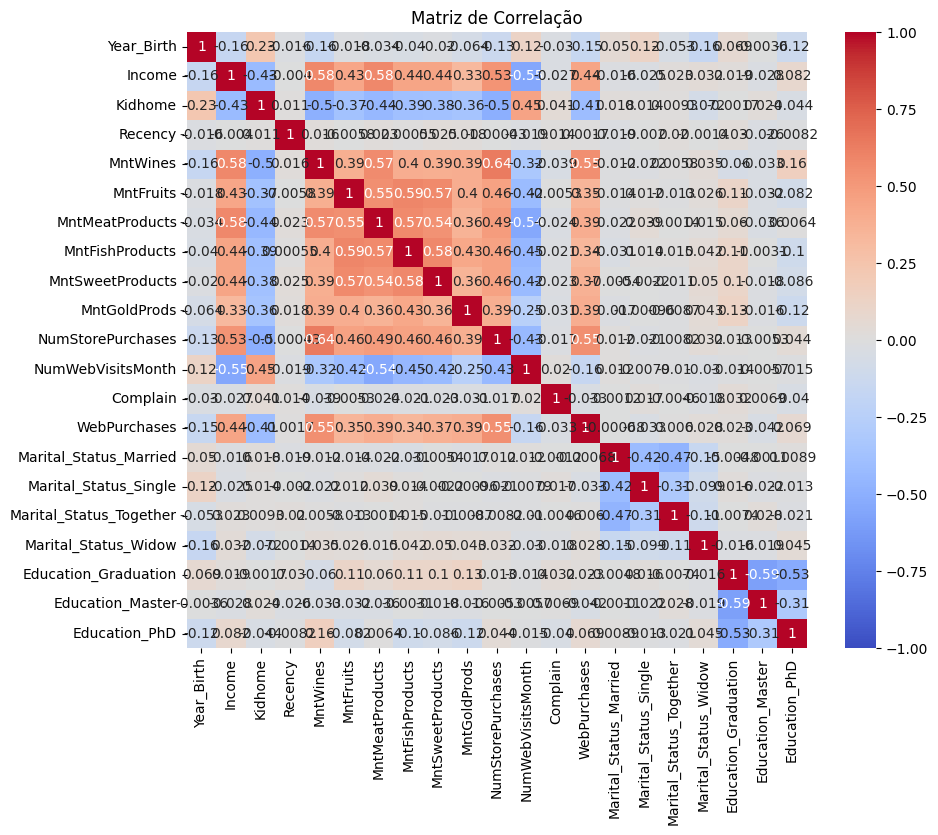

In [ ]:
correlation_matrix = df.corr()

# Plotando a matriz de correlação usando seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlação')
plt.show()

Como temos muitas variáveis e não conseguimos analisar corretamenteo a matriz de correlação irei pegar as principais variaveis relacionadas a nossa variavel target

In [ ]:
variavel_target = 'WebPurchases'

limiar_correlacao = 0.3  # Queremos correlações acima de 0.5 (positivas) ou abaixo de -0.5 (negativas)

# Crie uma lista vazia para guardar as variáveis com alta correlação
maiores_correlacoes = []

# Selecione apenas a série de correlações da sua variável alvo
# Isso torna o loop mais eficiente
correlations_with_target = correlation_matrix[variavel_target]

# Use .items() para iterar pelo nome da variável e o valor da correlação
for variavel, correlacao in correlations_with_target.items():
    # Condição 1: A variável não pode ser a própria variável alvo
    if variavel != variavel_target:
        # Condição 2: O valor absoluto da correlação deve ser maior que o nosso limiar
        if abs(correlacao) > limiar_correlacao:
            # Se as duas condições forem verdadeiras, adicione a variável à nossa lista
            maiores_correlacoes.append(variavel)

# Mostre o resultado final
print(f"Variável Alvo: '{variavel_target}'")
print(f"Limiar de Correlação: {limiar_correlacao}")
print("\nVariáveis com alta correlação encontradas:")
print(maiores_correlacoes)

Variável Alvo: 'WebPurchases'
Limiar de Correlação: 0.3

Variáveis com alta correlação encontradas:
['Income', 'Kidhome', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumStorePurchases']


In [ ]:
X = df.drop('WebPurchases', axis=1)
Y = df['WebPurchases']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)

X_test = sc.transform(X_test)

# ETAPA 3:

Irei utilizar Regressão Logística e Random Forest pois são os modelos mais avançados que conhecemos por enquanto

### Regressão Logística

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logistic_purchase = LogisticRegression(random_state = 0) # Criando o modelo


In [ ]:
logistic_purchase.fit(X_train, Y_train) # Treinando o modelo

LogisticRegression(random_state=0)

In [ ]:
previsoes = logistic_purchase.predict(X_train) # Fazendo previsões

#### Com Cross-Validation

In [ ]:
# Importando bibliotecas necessárias para fazer o Cross-Validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


In [ ]:
logistic_purchase_cv = LogisticRegression(random_state = 0, max_iter=1000, solver='liblinear') # Criando o modelo

In [ ]:
folds = 5

In [ ]:
crossvalidation = KFold(n_splits=folds, shuffle=True, random_state=42)

In [ ]:
logistic_cv_final = cross_val_score(logistic_purchase_cv, X, Y, cv = folds)

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier


In [ ]:
forest_purchase = RandomForestClassifier(random_state=42) # Criando o modelo

In [ ]:
forest_purchase.fit(X_train, Y_train) # Treinando o modelo

RandomForestClassifier(random_state=42)

In [ ]:
previsoes_forest = forest_purchase.predict(X_train) # Fazendo previsões

#### Random Forest - Cross Validation

In [ ]:
forest_purchase_cv = RandomForestClassifier(random_state = 0)

In [ ]:
crossvalidation_forest = KFold(n_splits=folds, shuffle=True, random_state=42)

In [ ]:
forest_cv_final = cross_val_score(forest_purchase_cv, X, Y, cv = folds)

# ETAPA 4:

**Avaliação**

Avalie os resultados encontrados nos dois modelos e identifique qual te pareceu realizar melhor as previsões.

Utilize além das métricas padrões a matriz de confusão.

### Logistic Regression

In [ ]:
relatorio = classification_report(Y_train, previsoes)
print("Relatório de Classificação:")
print(relatorio)

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.84      0.85      0.85       868
           1       0.85      0.85      0.85       904

    accuracy                           0.85      1772
   macro avg       0.85      0.85      0.85      1772
weighted avg       0.85      0.85      0.85      1772



Podemos ver que atingimos uma acurácia interessante com a Regressão Logistica, os dados estão com um pouco de ruídos então acredito que ela se saiu muito bem

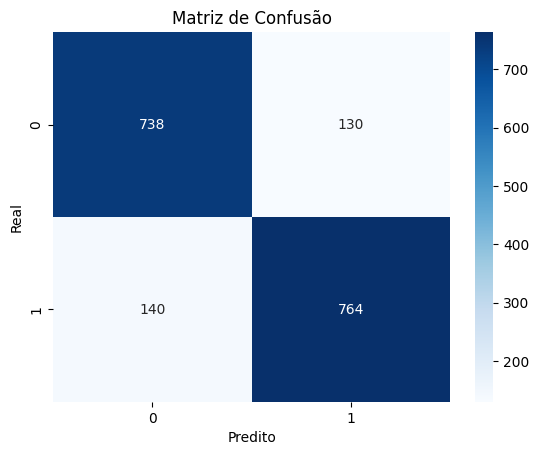

In [ ]:
cm = confusion_matrix(Y_train, previsoes)
labels = [0, 1]  # ou [0, 1] se for binário

sns.heatmap(pd.DataFrame(cm, index=labels, columns=labels),
            annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()

Podemos ver que tivemos uma distribuição boa, acertamos mais nossa variável 1 que seria a mais importante

---

### Logistic Regression - com Cross Validation

In [ ]:
pontuacoes = cross_val_score(logistic_purchase_cv, X, Y, cv=crossvalidation)

print(f"Pontuações por fold: {pontuacoes}")

Pontuações por fold: [0.84459459 0.84875847 0.82844244 0.77426637 0.83747178]


In [ ]:
print((logistic_cv_final.mean()))

0.8289793179183699


Quando utilizamos o Cross Validation ele cai um pouco para 82% mas continua sendo uma métrica muito boa para dados novos

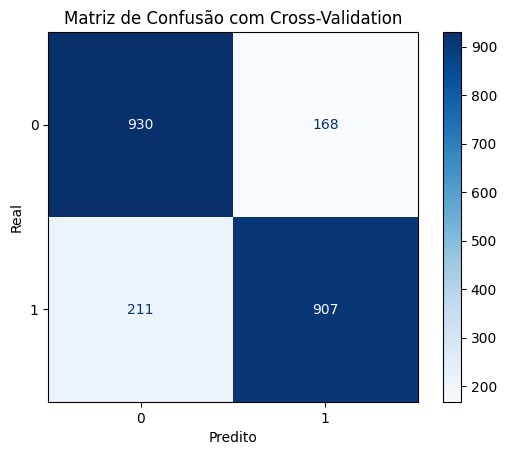

In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred_cv = cross_val_predict(logistic_purchase_cv, X, Y, cv=5)

cm = confusion_matrix(Y, y_pred_cv)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.title('Matriz de Confusão com Cross-Validation')
plt.show()

Podemos ver que o modelo acaba prevendo mais que o cliente não compraria do que compraria

---

### Random Forest

In [ ]:
relatorio_forest = classification_report(Y_train, previsoes_forest)
print("Relatório de Classificação:")
print(relatorio_forest)

Relatório de Classificação:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       868
           1       1.00      1.00      1.00       904

    accuracy                           1.00      1772
   macro avg       1.00      1.00      1.00      1772
weighted avg       1.00      1.00      1.00      1772



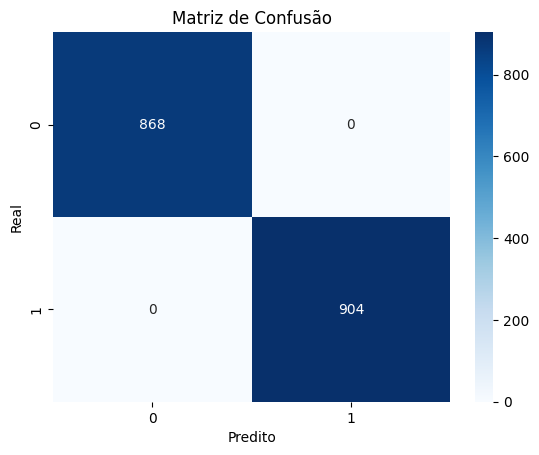

In [ ]:
cm = confusion_matrix(Y_train, previsoes_forest)
labels = [0, 1]

sns.heatmap(pd.DataFrame(cm, index=labels, columns=labels),
            annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()

Métrica impressionante do Random Forest com 100% em tudo, muito provavelmente na divisão dos dados de treino e teste ficou com uma amostragem muito boa, vamos ver no Cross Validation

---

### Random Forest - com Cross Validation

In [ ]:
pontuacoes_forest = cross_val_score(forest_purchase_cv, X, Y, cv=crossvalidation_forest)

print(f"Pontuações por fold: {pontuacoes_forest}")

Pontuações por fold: [0.90990991 0.88261851 0.89841986 0.90744921 0.9255079 ]


In [ ]:
print((forest_cv_final.mean()))

0.9115520712586175


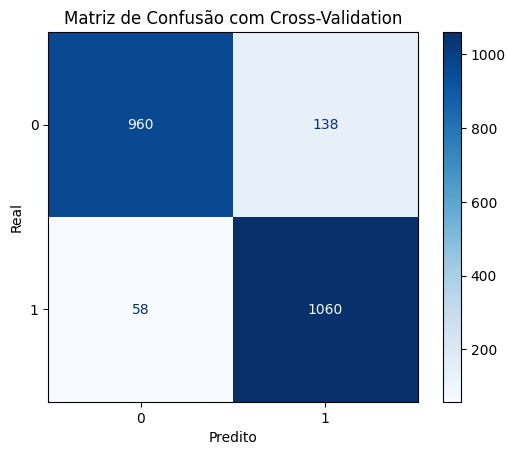

In [ ]:
y_pred_cv_forest = cross_val_predict(forest_purchase_cv, X, Y, cv=5)

cm_forest = confusion_matrix(Y, y_pred_cv_forest)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_forest)
disp.plot(cmap='Blues')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.title('Matriz de Confusão com Cross-Validation')
plt.show()

Mantém ainda um bom nivel com 91% de acerto, prevendo mais nossa variavel positiva, uma grande diferença do Random Forest para a Regressão Logística é que aqui o modelo prevê menos que o cliente não compraria e mais que o cliente compraria

### Considerações Finais

O modelo de Random Forest se saiu melhor, ele se adaptou melhor aos dados e mesmo utilizando o Cross Validation ele tem uma ótima perfomance, ele prevê mais que os clientes irão comprar, isso geraria um custo extra de marketing para a loja com os erros, mas acredito que neste caso esse erro é um pouco melhor do que errar que o cliente não irá comprar e ele iria, dessa forma indicaria o modelo de Random Forest